# Investigate the Data

In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from FiveThirtyEight. FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

In [22]:
import pandas as pd

survey = pd.read_csv("masculinity.csv")
survey.head()

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [23]:
survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [24]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1189 non-null   int64  
 1   StartDate    1189 non-null   object 
 2   EndDate      1189 non-null   object 
 3   q0001        1189 non-null   object 
 4   q0002        1189 non-null   object 
 5   q0004_0001   1189 non-null   object 
 6   q0004_0002   1189 non-null   object 
 7   q0004_0003   1189 non-null   object 
 8   q0004_0004   1189 non-null   object 
 9   q0004_0005   1189 non-null   object 
 10  q0004_0006   1189 non-null   object 
 11  q0005        1189 non-null   object 
 12  q0007_0001   1189 non-null   object 
 13  q0007_0002   1189 non-null   object 
 14  q0007_0003   1189 non-null   object 
 15  q0007_0004   1189 non-null   object 
 16  q0007_0005   1189 non-null   object 
 17  q0007_0006   1189 non-null   object 
 18  q0007_0007   1189 non-null   object 
 19  q0007_

In [25]:
survey.describe()

,Unnamed: 0,weight
count,1189.000000,1188.000000
mean,595.000000,0.845104
std,343.379042,1.256521
min,1.000000,0.019744
25%,298.000000,0.074933
50%,595.000000,0.536891
75%,892.000000,0.802008
max,1189.000000,8.676606


In [26]:
len(survey)

1189

In [27]:
survey["q0007_0001"].value_counts()

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64

# Mapping the Data

In [28]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]

for col in cols_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
    
print(survey['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


# Plotting the Data

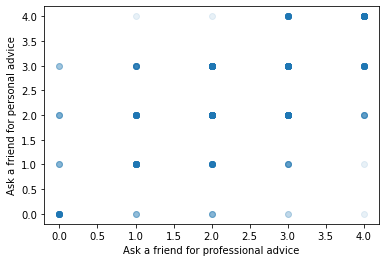

In [30]:
from matplotlib import pyplot as plt

plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.1)
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

# Build the KMeans Model

In [36]:
from sklearn.cluster import KMeans
rows_to_cluster = survey.dropna(subset = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",\
                                          "q0007_0005", "q0007_0008", "q0007_0009"])
classifier = KMeans(n_clusters=2)

In [41]:
classifier.fit(rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",\
                                "q0007_0005", "q0007_0008", "q0007_0009"]])
print(classifier.cluster_centers_)

[[1.87830688 1.84391534 0.85185185 1.72486772 0.57142857 2.64021164
  1.97089947]
 [2.84548105 2.81632653 2.84110787 2.39941691 0.69387755 3.06997085
  2.90087464]]


# Separate the Cluster Members

In [42]:
print(classifier.labels_)

[1 0 1 ... 0 0 0]


In [45]:
cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
print(cluster_one_indices)

[0, 2, 3, 5, 8, 11, 13, 15, 16, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 50, 56, 59, 60, 61, 64, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 80, 81, 83, 85, 91, 93, 96, 99, 100, 102, 103, 104, 105, 108, 110, 111, 112, 114, 115, 120, 121, 122, 124, 125, 126, 127, 133, 135, 136, 137, 138, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 177, 182, 183, 185, 186, 188, 190, 191, 192, 193, 194, 197, 200, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 232, 234, 235, 238, 239, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 257, 258, 259, 262, 265, 266, 267, 268, 269, 270, 271, 273, 274, 276, 277, 278, 279, 280, 282, 285, 287, 289, 290, 292, 293, 294, 295, 298, 302, 303, 304, 306, 307, 308, 309, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 326, 3

In [46]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))

Some college            0.314815
College or more         0.285714
Post graduate degree    0.251323
High school or less     0.145503
Name: educ4, dtype: float64
Post graduate degree    0.365889
College or more         0.330904
Some college            0.230321
High school or less     0.072886
Name: educ4, dtype: float64
